## Compare two runs with different number of ports

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr

In [46]:
# make land versions of cmaps, land is grey
cm_matter = copy.copy(cm.matter)
cm_matter.set_bad('grey')

In [2]:
two_flux = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_lessflow/SalishSea_1h_20230301_20230305_grid_T.nc'
                         )

In [4]:
four_flux = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_smear//SalishSea_1h_20230301_20230310_grid_T.nc'
                         )

In [78]:
more_four_flux = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_smear_15/SalishSea_1h_20230311_20230325_grid_T.nc')

In [5]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mesh = mesh.rename({'z': 'deptht'})
tmask = mesh.tmask[0]
area = mesh.e1t[0] * mesh.e2t[0]

In [29]:
iz = 0  # width of domain plotted
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
time_stride = 3
t_slice = slice(None, None, time_stride)

In [7]:
data_two = two_flux.outfall.isel(time_counter=t_slice, y=y_slice, x=x_slice)

In [30]:
data_four = four_flux.outfall.isel(time_counter=t_slice, y=y_slice, x=x_slice)

In [79]:
data_four_plus = more_four_flux.outfall.isel(time_counter=t_slice, y=y_slice, x=x_slice)

In [9]:
tmask_data = tmask.isel(y=y_slice, x=x_slice)
area_data = area.isel(y=y_slice, x=x_slice)

In [80]:
simple_two = (data_two * area_data * tmask_data).sum(axis=2).sum(axis=2) 
simple_four = (data_four * area_data * tmask_data).sum(axis=2).sum(axis=2) 
simple_four_plus = (data_four_plus * area_data * tmask_data).sum(axis=2).sum(axis=2)

In [11]:
def find_mode(simple):
    mode = np.zeros(simple.shape[0])
    for tt, time in enumerate(simple.time_counter):
        mode[tt] = simple[tt].deptht[simple[tt] == simple[tt].max(axis=0)]
    print (mode[-1])
    return mode

In [81]:
mode_two = find_mode(simple_two)
mode_four = find_mode(simple_four)
mode_four_plus = find_mode(simple_four_plus)

34.68575668334961
44.517723083496094
44.517723083496094


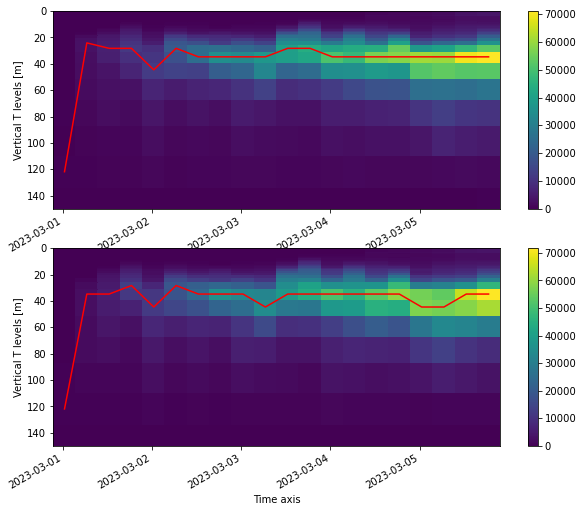

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
simple_two.transpose().plot(ax=axs[0], yincrease=False)
axs[0].plot(simple_two.time_counter, mode_two, 'r')
simple_four[:20].transpose().plot(ax=axs[1], yincrease=False)
axs[1].plot(simple_four[:20].time_counter, mode_four[:20], 'r')
for ax in axs:
    ax.set_ylim(150, 0);

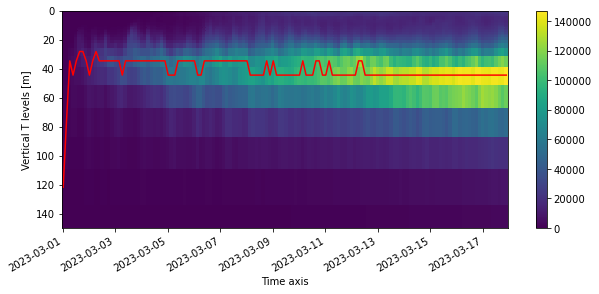

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
all_four = xr.concat([simple_four, simple_four_plus], dim='time_counter')
all_mode = np.concatenate([mode_four, mode_four_plus])
all_four.transpose().plot(ax=ax, yincrease=False)
ax.plot(all_four.time_counter, all_mode, 'r')


ax.set_ylim(150, 0);

In [90]:
print (mode_four.shape, all_mode.shape)

(80,) (136,)


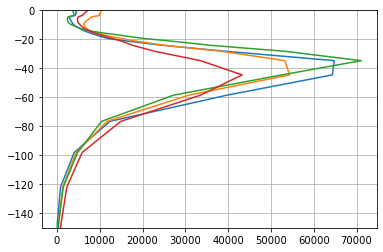

In [91]:
plt.plot(simple_four[40], -simple_four.deptht)
plt.plot(simple_four[-1]/2., -simple_four.deptht)
plt.plot(simple_two[-1], -simple_two.deptht)
plt.plot(simple_four_plus[-1]*40/136., -simple_four_plus.deptht)
plt.ylim(-150, 0)
plt.grid();

## Conclusion

Increasing the ports to 4 slightly increased the depth of the plume
The depth of the plume is increasing in time.

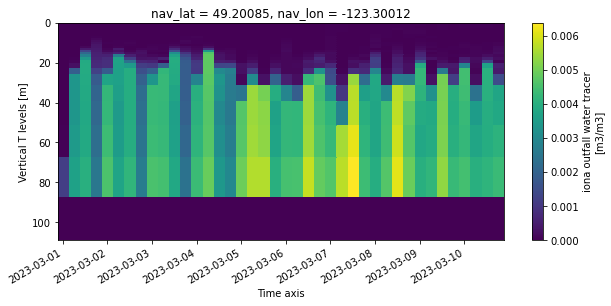

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
data_four[:, :27, 446-400, 305-250].transpose().plot(yincrease=False)

In [20]:
salinity_field = four_flux.vosaline[::6, :27, 446, 305]

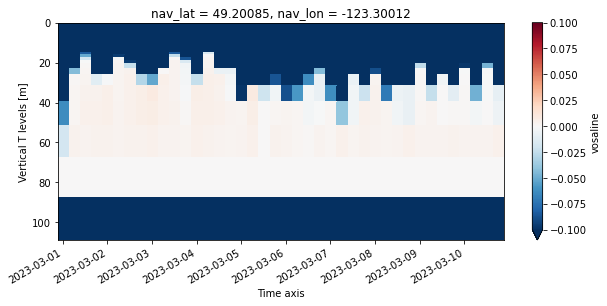

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
(salinity_field - salinity_field[:, 25]).transpose().plot(yincrease=False, vmin=-0.1);

In [22]:
salinity_field = four_flux.vosaline[::6, :29, 447, 304]

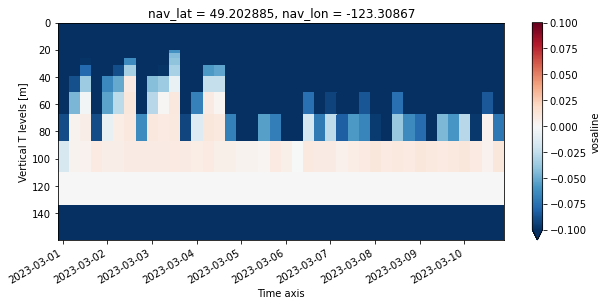

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
(salinity_field - salinity_field[:, 27]).transpose().plot(yincrease=False, vmin=-0.1);

In [24]:
salinity_field = four_flux.vosaline[::6, :28, 447, 305]

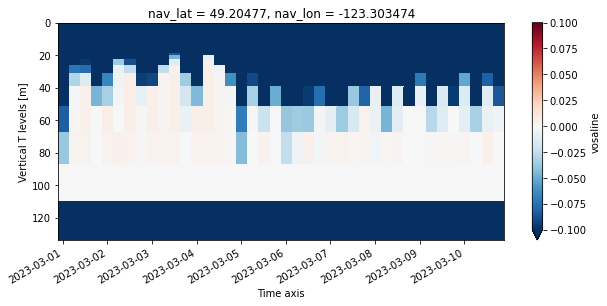

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
(salinity_field - salinity_field[:, 26]).transpose().plot(yincrease=False, vmin=-0.1);

In [48]:
data_four.shape

(80, 40, 100, 100)

2023-03-04T12:30:00.000000000
2023-03-06T12:30:00.000000000
2023-03-08T12:30:00.000000000
2023-03-10T12:30:00.000000000


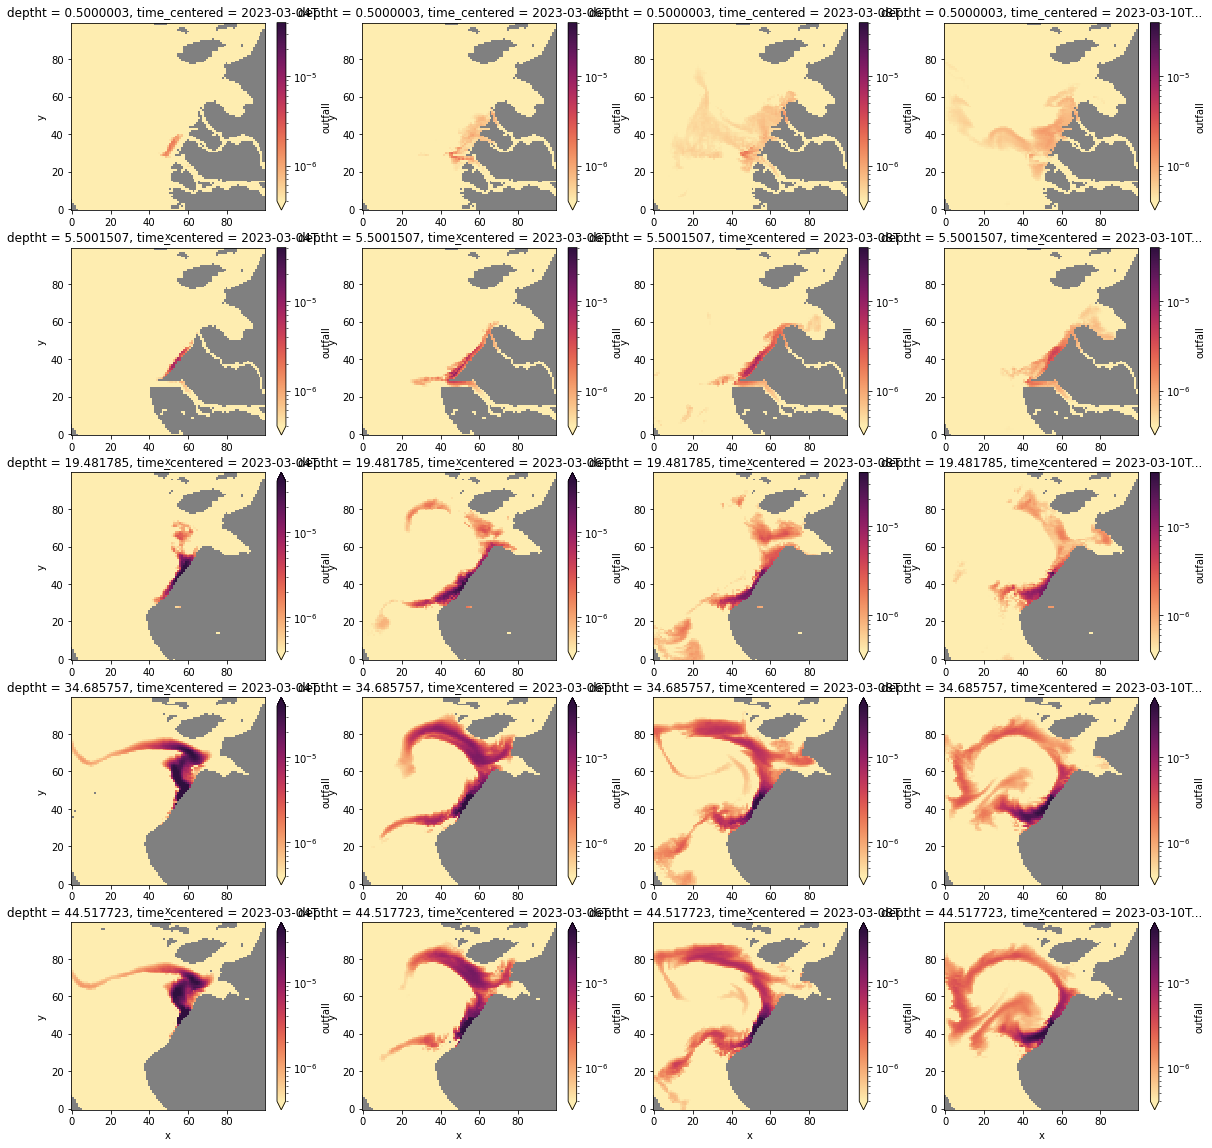

In [59]:
ts = [7*4, 11*4, 15*4, 19*4]
ds = [0, 5, 18, 22, 23]

fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for ii in range(4):
    print ((data_four[ts[ii]].time_counter).values)
    for jj in range(5):
        (data_four[ts[ii], ds[jj], :, :].where(tmask_data[ds[jj], :, :])/ts[ii]).plot(ax=axs[jj,ii], cmap=cm_matter,
                                                                       norm=colors.LogNorm(vmin=4e-7, vmax=4e-5)) 

2023-03-04T12:30:00.000000000
2023-03-06T12:30:00.000000000
2023-03-08T12:30:00.000000000
2023-03-10T12:30:00.000000000


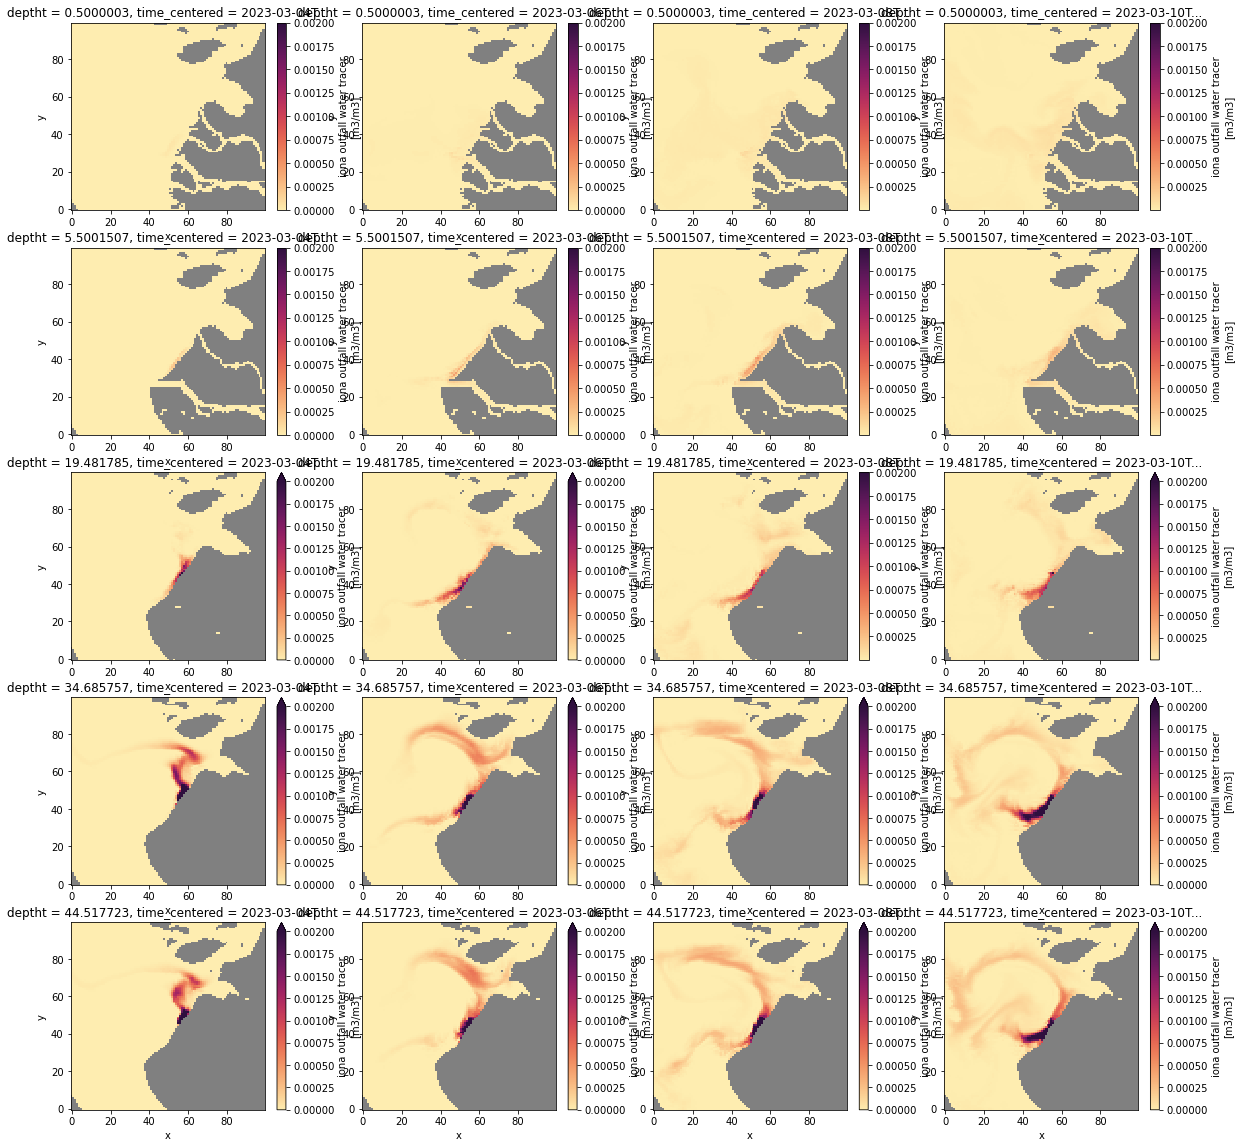

In [98]:
ts = [7*4, 11*4, 15*4, 19*4]
ds = [0, 5, 18, 22, 23]

fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for ii in range(4):
    print ((data_four[ts[ii]].time_counter).values)
    for jj in range(5):
        (data_four[ts[ii], ds[jj], :, :].where(tmask_data[ds[jj], :, :])).plot(
            ax=axs[jj,ii], cmap=cm_matter, vmax=0.002)

In [67]:
salinity_field = four_flux.vosaline[t_slice, :, y_slice, x_slice]

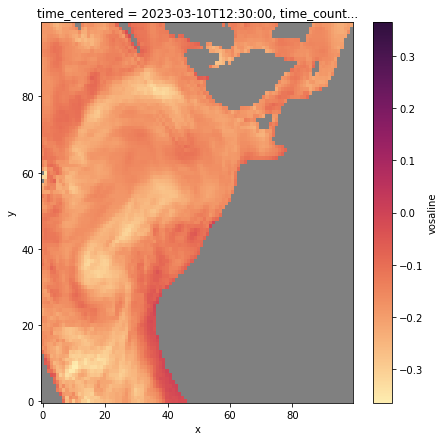

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
(salinity_field[ts[3], 24] - salinity_field[ts[3], 26]).where(tmask_data[26, :, :]).plot(cmap=cm_matter);

2023-03-13T15:30:00.000000000
2023-03-15T03:30:00.000000000
2023-03-16T15:30:00.000000000
2023-03-17T21:30:00.000000000


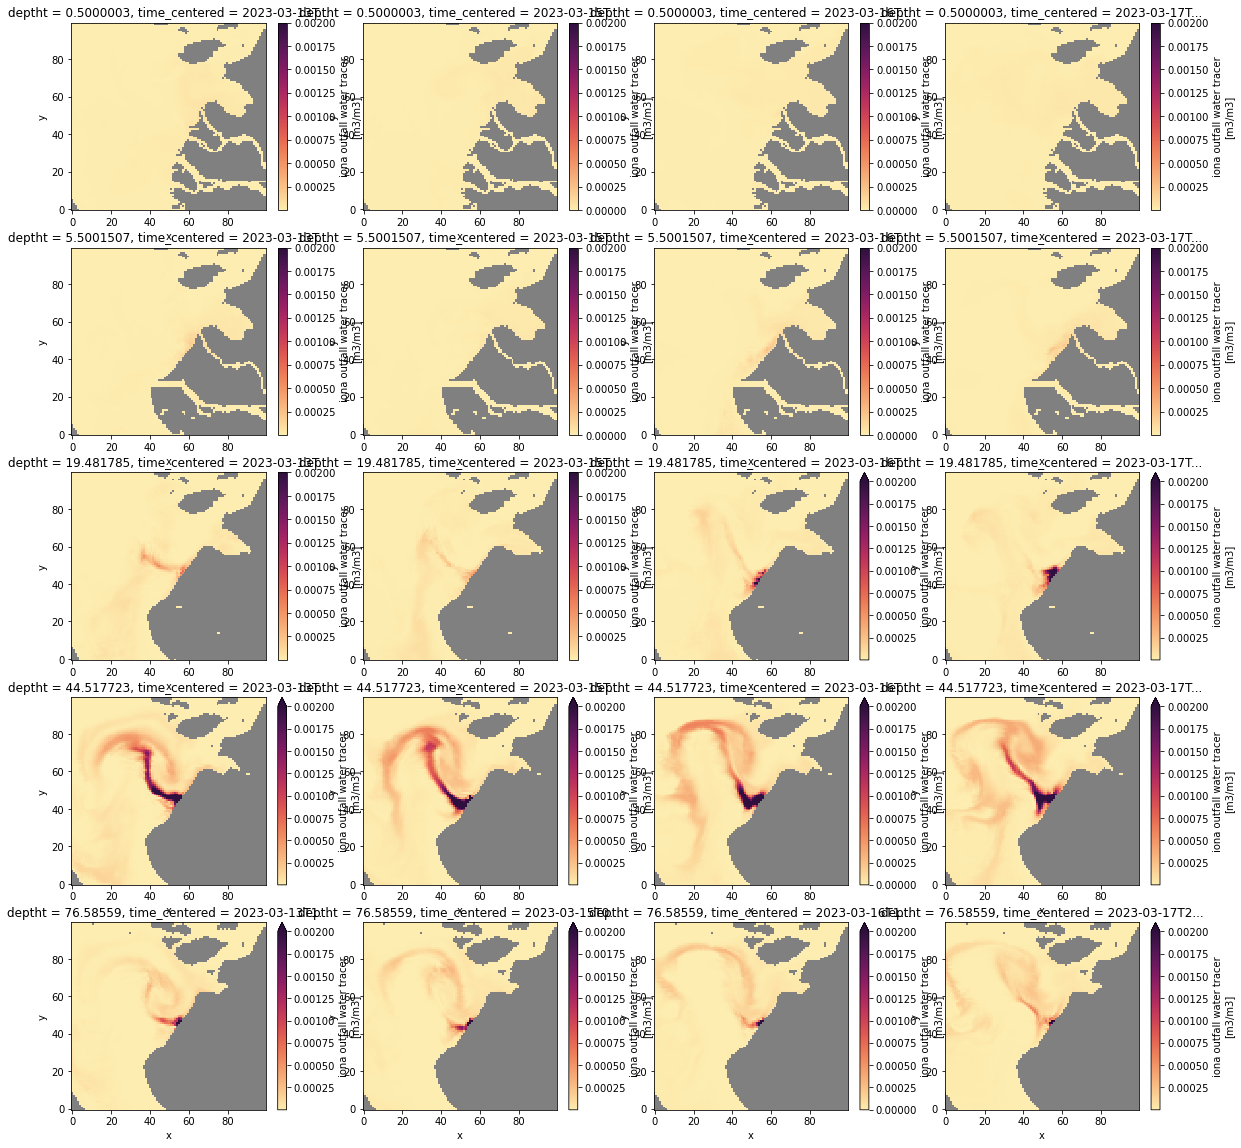

In [99]:
ts = [7*3, 11*3, 15*3, 19*3-2]
ds = [0, 5, 18, 23, 25]

fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for ii in range(4):
    print ((data_four_plus[ts[ii]].time_counter).values)
    for jj in range(5):
        (data_four_plus[ts[ii], ds[jj], :, :].where(tmask_data[ds[jj], :, :])).plot(
            ax=axs[jj,ii], cmap=cm_matter, vmax=0.002)

2023-03-13T15:30:00.000000000
2023-03-15T03:30:00.000000000
2023-03-16T15:30:00.000000000
2023-03-17T21:30:00.000000000


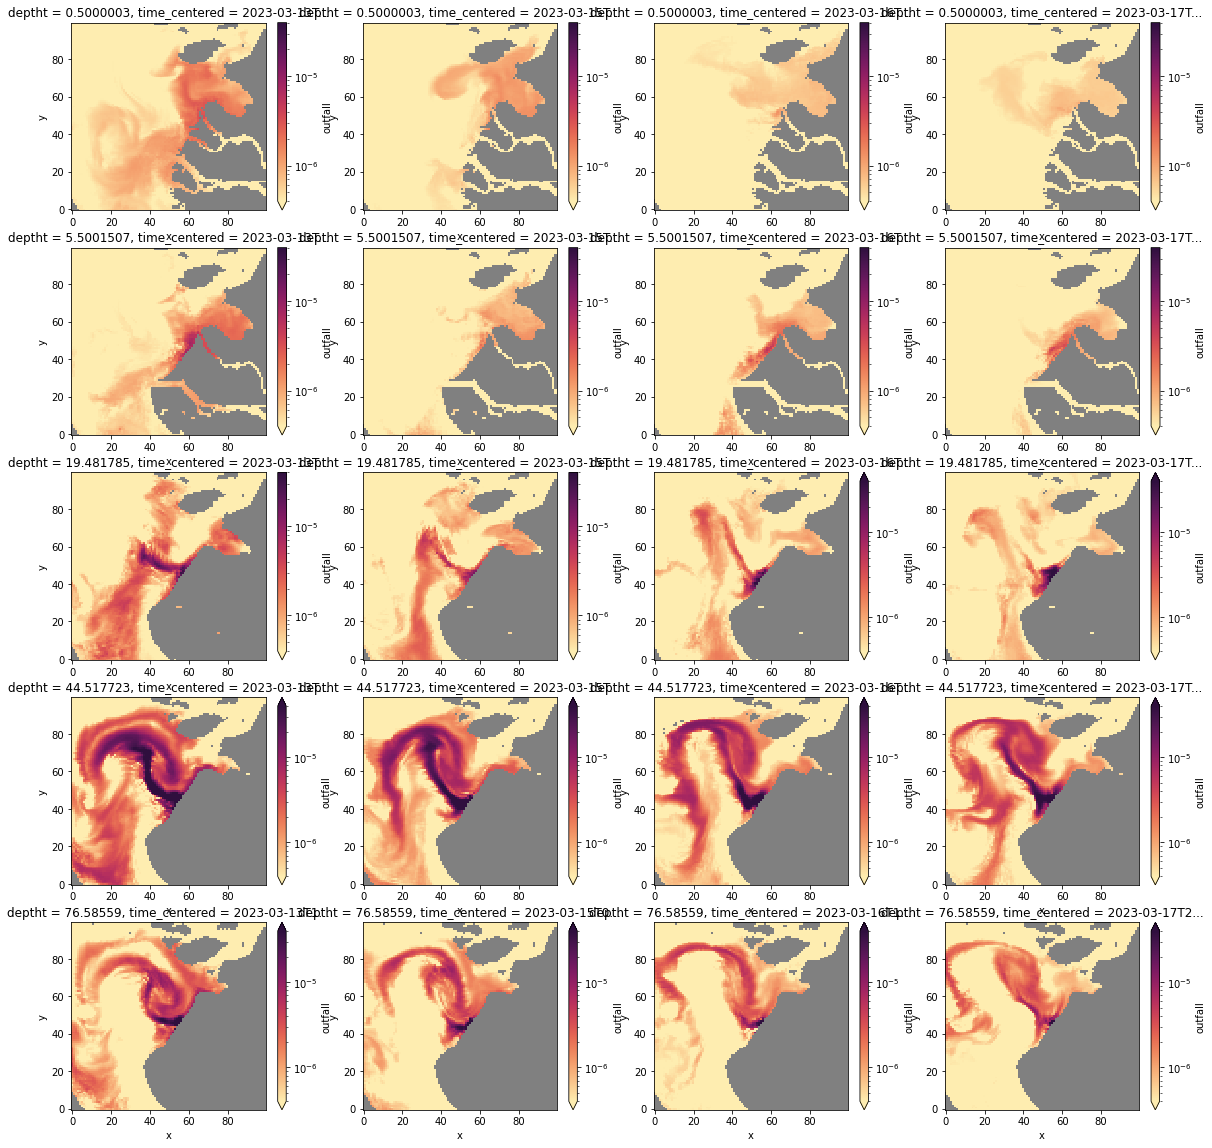

In [100]:
ts = [7*3, 11*3, 15*3, 19*3-2]
ds = [0, 5, 18, 23, 25]

fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for ii in range(4):
    print ((data_four_plus[ts[ii]].time_counter).values)
    for jj in range(5):
        (data_four_plus[ts[ii], ds[jj], :, :].where(tmask_data[ds[jj], :, :])/ts[ii]).plot(
            ax=axs[jj,ii], cmap=cm_matter, norm=colors.LogNorm(vmin=4e-7, vmax=4e-5))